## 1. Loading data into a dictionary
<img src="https://images.pexels.com/photos/4009402/pexels-photo-4009402.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="notext" width="1920" height="600"/>

For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>

In [2]:
# Create the years and durations lists
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
# Create a dictionary with the two lists
moviedict = {'years': years, 'durations':durations}

# Print the dictionary
print(moviedict)

{'years': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## 2. Creating a DataFrame from a dictionary

In [3]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
df = pd.DataFrame(moviedict)

# Print the DataFrame
print(df)

  years  durations
0  2011        103
1  2012        101
2  2013         99
3  2014        100
4  2015        100
5  2016         95
6  2017         95
7  2018         96
8  2019         93
9  2020         90


## 3. A visual inspection of our data

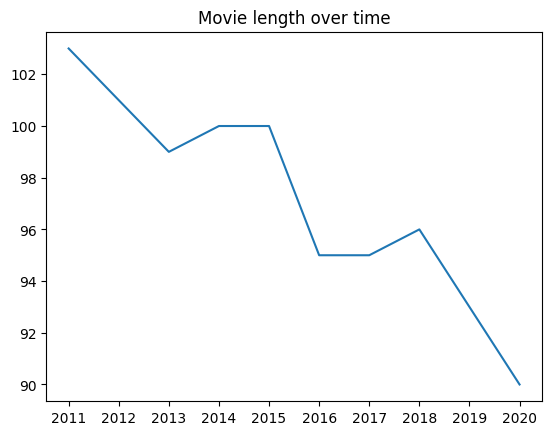

In [4]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt

# Draw a line plot of release_years and durations
plt.plot(df['years'], df['durations'])

# Create a title
plt.title('Movie length over time')

# Show the plot
plt.show()

## 4. Loading the rest of the data from a CSV

In [5]:
# Read in the CSV as a DataFrame
moviesdf = pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
print(moviesdf.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

## 5. Filtering for movies

In [6]:
# Subset the DataFrame for type "Movie"
netflix_movies = moviesdf[moviesdf['type'] == 'Movie']

# Select only the columns of interest
netflix_columns = netflix_movies[['type', 'title', 'country', 'genre', 'release_year', 'duration']] 

# Print the first five rows of the new DataFrame
print(netflix_columns.head(5))

    type  title        country          genre  release_year  duration
1  Movie   7:19         Mexico         Dramas          2016        93
2  Movie  23:59      Singapore  Horror Movies          2011        78
3  Movie      9  United States         Action          2009        80
4  Movie     21  United States         Dramas          2008       123
6  Movie    122          Egypt  Horror Movies          2019        95


## 6. Creating a scatter plot

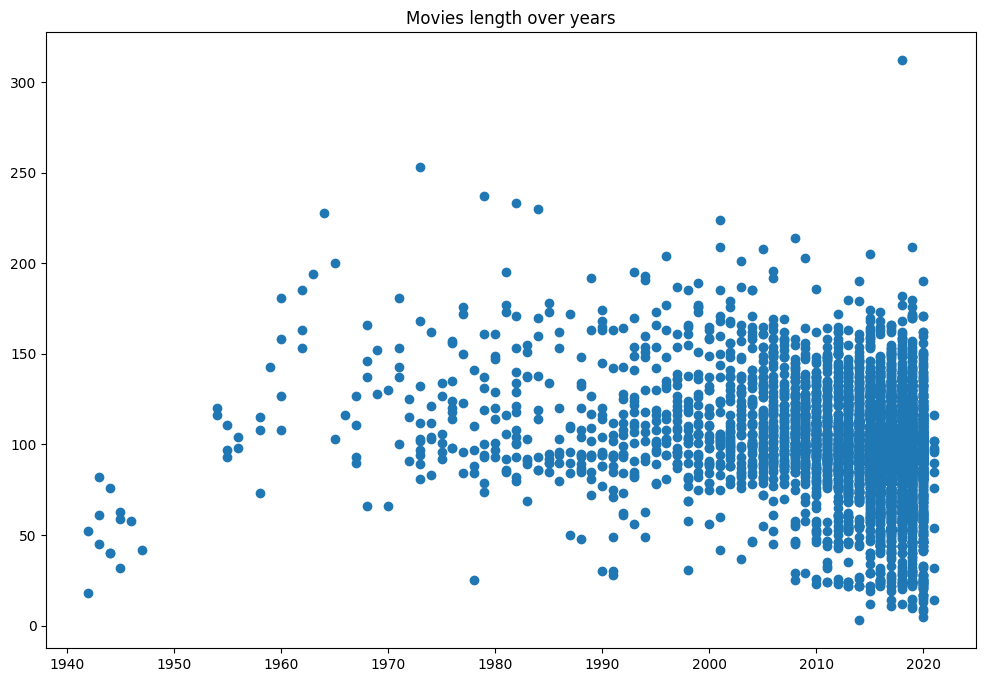

In [7]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_columns.release_year, netflix_columns.duration)

# Create a title
plt.title('Movies length over years')

# Show the plot
plt.show()

## 7. Digging deeper

In [8]:
# Filter for durations shorter than 60 minutes
moviesunder60 = netflix_columns[netflix_columns['duration'] < 60]

# Print the first 20 rows of short_movies
print(moviesunder60.head(20))

      type                                              title         country  \
35   Movie                                          #Rucker50   United States   
55   Movie                100 Things to do Before High School   United States   
67   Movie  13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101  Movie                                  3 Seconds Divorce          Canada   
146  Movie                                     A 3 Minute Hug          Mexico   
162  Movie  A Christmas Special: Miraculous: Tales of Lady...          France   
171  Movie                         A Family Reunion Christmas   United States   
177  Movie                    A Go! Go! Cory Carson Christmas   United States   
178  Movie                    A Go! Go! Cory Carson Halloween             NaN   
179  Movie                  A Go! Go! Cory Carson Summer Camp             NaN   
181  Movie             A Grand Night In: The Story of Aardman  United Kingdom   
200  Movie                  

## 8. Marking non-feature films

In [14]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for genre in netflix_columns.genre:
    if genre == 'Children':
        colors.append('red')
    elif genre == 'Documentaries':
        colors.append('green')
    elif genre == 'Stand-Up':
        colors.append('blue')
    else:
        colors.append('purple')
        
# Inspect the first 10 values in your list        
print(colors[:10])



['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'green']


## 9. Plotting with color

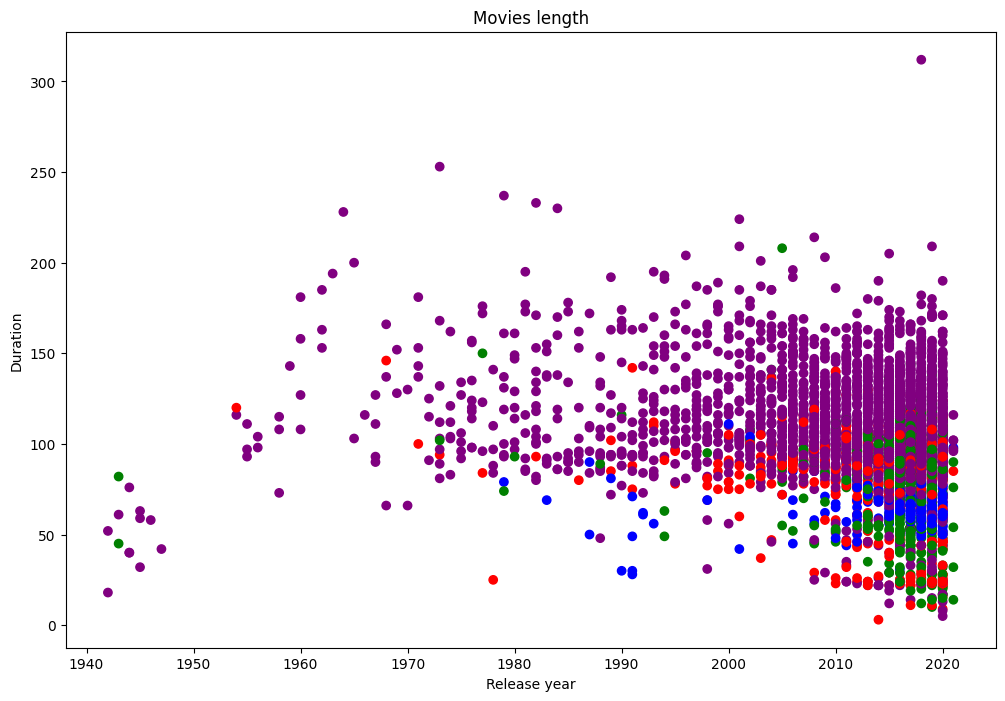

In [19]:
# Set the figure style and initalize a new figure
figure2 = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_columns.release_year, netflix_columns.duration, c = colors )
# Create a title and axis labels
plt.title('Movies length')
plt.xlabel('Release year')
plt.ylabel('Duration')

# Show the plot
plt.show()